# GAUSSIAN FILTER : PL

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from pynq import Overlay, Xlnk
import pynq_cv.overlays.xv2Filter2DDilate as xv2
from pynq import allocate


In [10]:


ol = Overlay("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.bit")

Xlnk.set_allocator_library("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.so")



In [64]:
og_image = cv2.imread('bellatrix.jpg', cv2.IMREAD_GRAYSCALE)


s = 1

image = cv2.resize(og_image, (0, 0), fx=s, fy=s, interpolation=cv2.INTER_AREA)

height, width = image.shape


In [65]:

xFimg = allocate(shape=(height, width), dtype=np.uint8)
xFout = allocate(shape=(height, width), dtype=np.uint8)

xFimg[:] = image[:]

xFimg.flush()

In [66]:
#def gaussian_kernel(size: int, sigma: float):
#    """Generates a 2D Gaussian kernel."""
#   ax = np.linspace(-(size // 2), size // 2, size)
#    xx, yy = np.meshgrid(ax, ax)
#    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
#    return kernel / np.sum(kernel)


#kernel = gaussian_kernel(r*2+1, sigma)

#kernel = np.array([[1,  4,  6,  4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1,  4,  6,  4, 1]], np.float32)



kernel = np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]],np.float32)



In [67]:
start_time = time.time()

xv2.filter2D(xFimg, -1, kernel, dst=xFout, borderType=cv2.BORDER_CONSTANT)

end_time = time.time()
elapsed_time = (end_time - start_time) * 1000

In [63]:

print(f"Image size       : {width} x {height} pixels")
print(f"Kernel size      : 3 x 3")
print(f"Box blur (mean filter) execution time: {elapsed_time:.3f} ms")

Image size       : 1800 x 1800 pixels
Kernel size      : 3 x 3
Box blur (mean filter) execution time: 33.893 ms


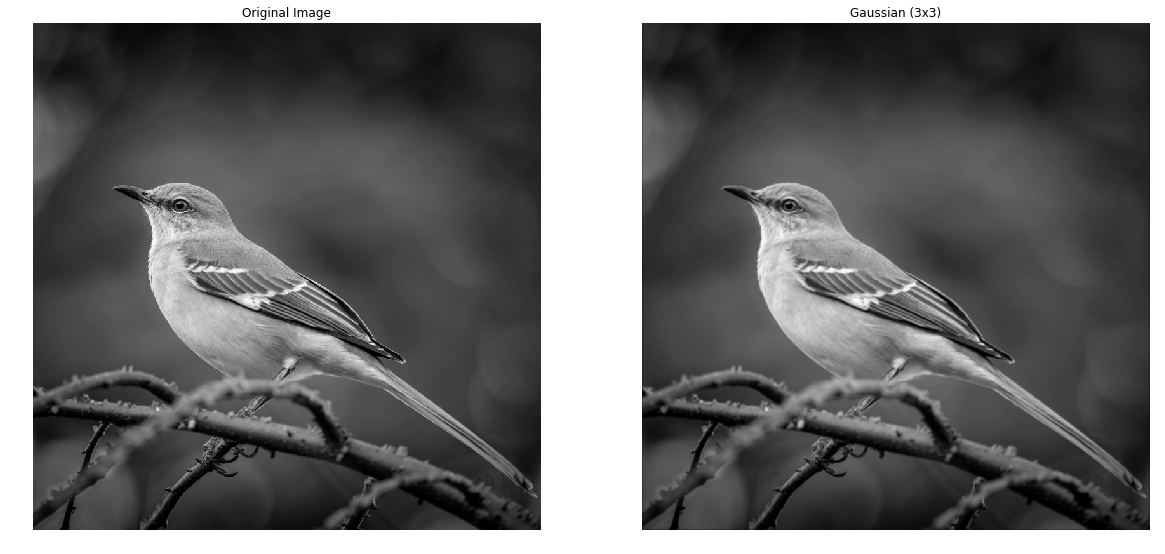

In [37]:

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(xFout, cmap='gray')
plt.title(f"Gaussian (3 x 3)")
plt.axis('off')

plt.show()


In [38]:
xFout.invalidate()